# Estadístico de orden k

## Introducción

El estadístico de orden k de un conjunto de n elementos es el el k-ésimo elemento más pequeño. Son casos particulares de estos el máximo (k = n-1), el mínimo (k = 0) y la mediana de un conjunto (k = n/2). Se propone analizar varios algoritmos que computan este valor.

## Análisis de los algoritmos

In [1]:
%matplotlib inline
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np
from math import floor

from functools import partial
import brute_force, order_and_select, k_selections, k_heapsort, heap_select, quick_select

In [2]:
def random_items(n_iteration):
    elems = list(range(2**n_iteration))
    random.shuffle(elems)
    return elems
    #return [random.randint(0, 2**n_iteration) for _ in range(2**n_iteration)]

_random_cache = {}
def random_items_with_memoization(n_iteration):
    # Cada vez que se llama con el mismo n_iteration, devuelve el mismo valor
    # mucho más rapido que el full random
    if n_iteration in _random_cache:
        return _random_cache[n_iteration]
    items = get_random_items(n_iteration)
    _random_cache[n_iteration] = items
    return items

def same_items(n_iteration, el=1):
    return [el for _ in range(2**n_iteration)]

def ordered_items(n_iteration):
    return list(range(2**n_iteration))

In [3]:
def min_k(num):
    return 0

def max_k(num):
    # 0-based
    return num - 1

def median_k(num):
    return floor(num/2)

def plot_algorithms(modules, k_func=min_k, number=3, maxiter=10, 
                    items_getter=random_items, title='', savefig=False):
    for module in modules:
        x, y = [], []
        for exp in range(2, maxiter):
            times = []
            for i in range(number):
                items = items_getter(exp)
                algorithm = module.__dict__['k_min']
                timer = timeit.Timer(partial(algorithm, items, k_func(2**exp)))
                times.append(timer.timeit(1))
            t = np.mean(times)
            y.append(t)
            x.append(2**exp)
        plt.plot(x, y, label=module.__name__)

    plt.title(title)
    plt.ylabel('Tiempo de ejecución')
    plt.xlabel('Cantidad de elementos en el conjunto')
    plt.legend(loc='upper left', prop={'size': 10})
    if savefig:
        # el nombre del archivo es: como son los elementos, iteraciones, k, cantidad de algoritmos
        filename = '_'.join([items_getter.__name__, '2', str(maxiter), k_func.__name__, str(len(modules)), 'algs'])
        plt.savefig('images/' + filename + '.png', bbox_inches='tight')
    plt.show()

In [4]:
# Estos son los algoritmos que tiene sentido analizar en todos los casos (lineales y logaritmicos)
algs = [order_and_select, k_heapsort, heap_select, quick_select]
# Estos son todos los algoritmos (+exponenciales)
all_algs = [brute_force, k_selections] + algs

## Comparación de la ejecución de los algoritmos

### Elementos desordenados, 2^12 elementos

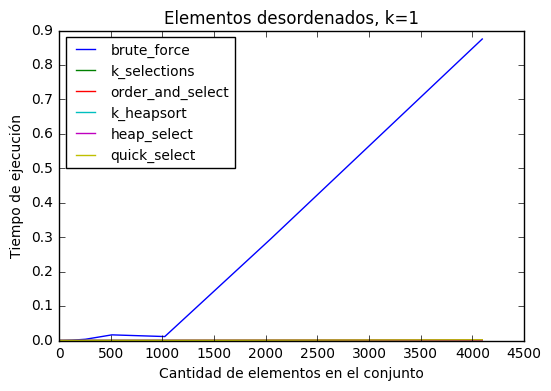

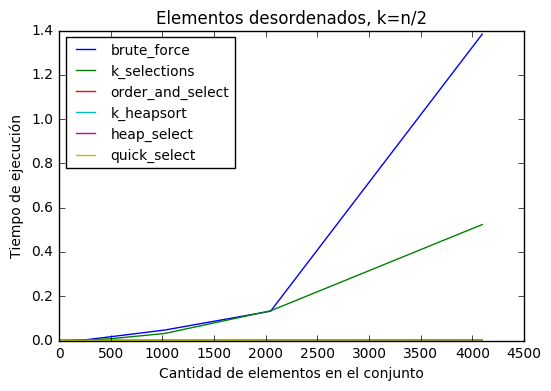

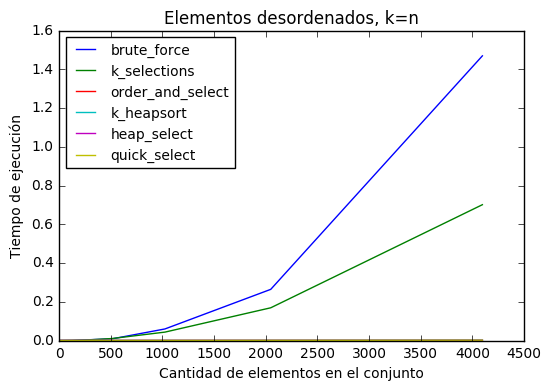

In [5]:
# Maxiter 13 es el útlimo que da tiempos aceptables para el brute force
title = 'Elementos desordenados, k='
plot_algorithms(all_algs, min_k, maxiter=13, title=title+'1')
plot_algorithms(all_algs, median_k, maxiter=13, title=title+'n/2')
plot_algorithms(all_algs, max_k, maxiter=13, title=title+'n')

### Lo mismo pero sin los algoritmos exponenciales

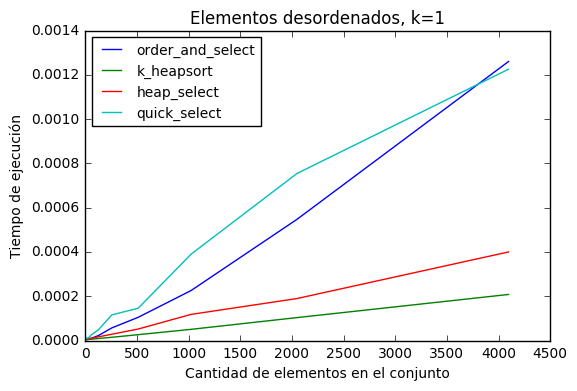

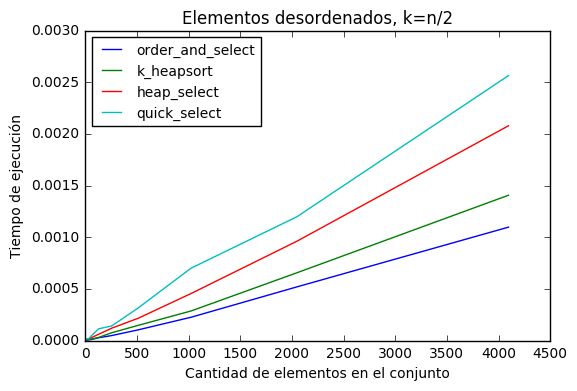

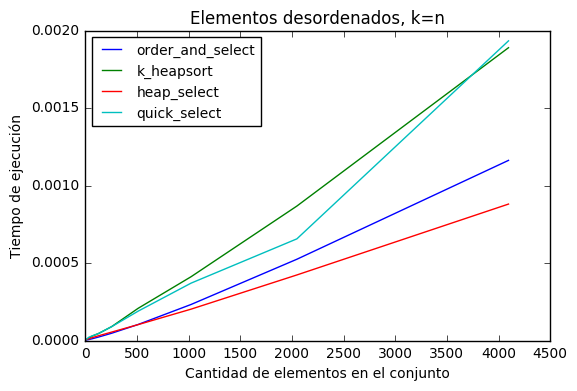

In [6]:
title = 'Elementos desordenados, k='
plot_algorithms(algs, min_k, maxiter=13, title=title+'1')
plot_algorithms(algs, median_k, maxiter=13, title=title+'n/2')
plot_algorithms(algs, max_k, maxiter=13, title=title+'n')

### Elementos desordenados, solo algoritmos no exponenciales, hasta 2^20 elementos

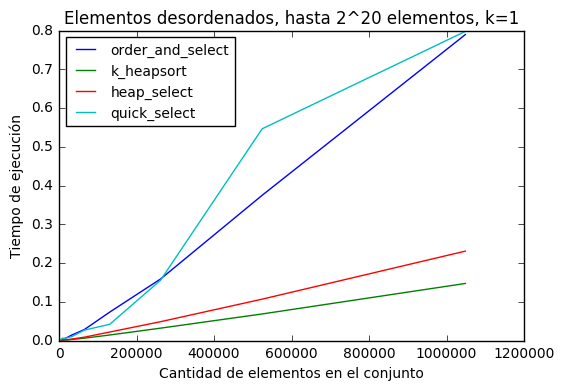

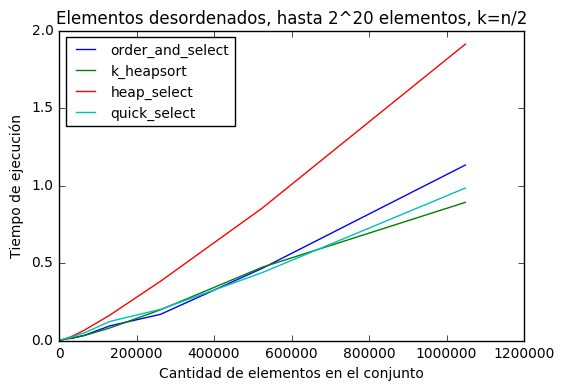

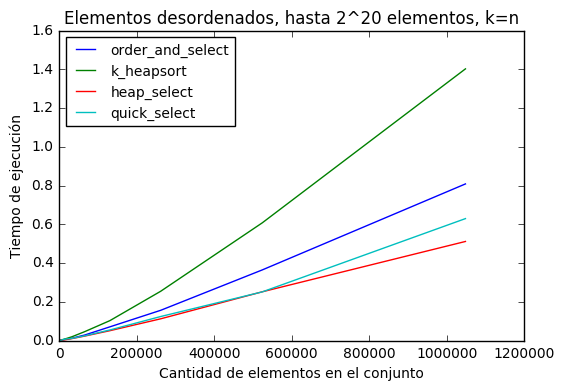

In [7]:
title = 'Elementos desordenados, hasta 2^20 elementos, k='
plot_algorithms(algs, min_k, maxiter=21, title=title+'1')
plot_algorithms(algs, median_k, maxiter=21, title=title+'n/2')
plot_algorithms(algs, max_k, maxiter=21, title=title+'n')

#### Aún más elementos (2^23) 
Lo dejo comentado porque puede tardar mucho, en mi máquina ~3 minutos y ~700mb de memoria.

In [8]:
#plot_algorithms([order_and_select, k_selections, k_heapsort, heap_select, quick_select], min_k, maxiter=24)
#plot_algorithms([order_and_select, k_selections, k_heapsort, heap_select, quick_select], max_k, maxiter=24)
#plot_algorithms([order_and_select, k_selections, k_heapsort, heap_select, quick_select], median_k, maxiter=24)

### Tiempo de ejecución usando listas con el mismo elemento

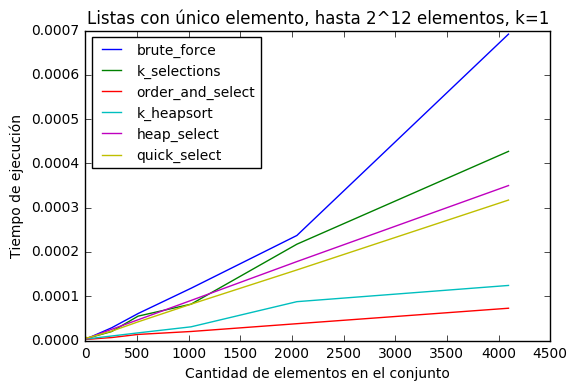

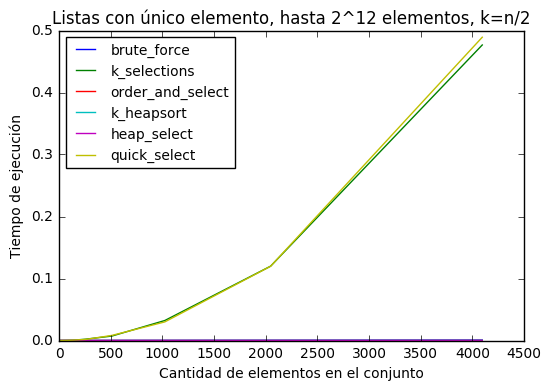

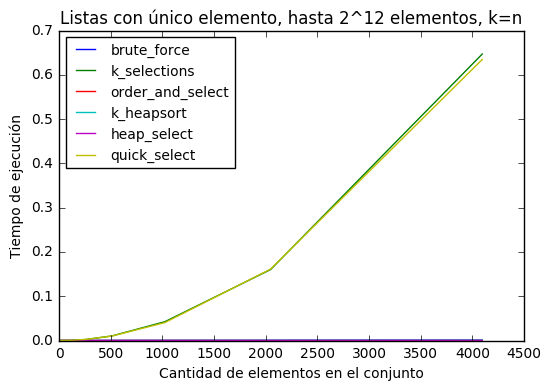

In [9]:
title = 'Listas con único elemento, hasta 2^12 elementos, k='
plot_algorithms(all_algs, min_k, items_getter=same_items, maxiter=13, title=title+'1')
plot_algorithms(all_algs, median_k, items_getter=same_items, maxiter=13, title=title+'n/2')
plot_algorithms(all_algs, max_k, items_getter=same_items, maxiter=13, title=title+'n')

### Listas con único elemento, solo algoritmos no exponenciales, 2^20 elementos

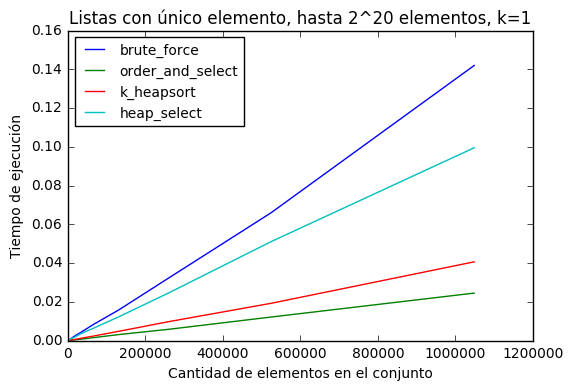

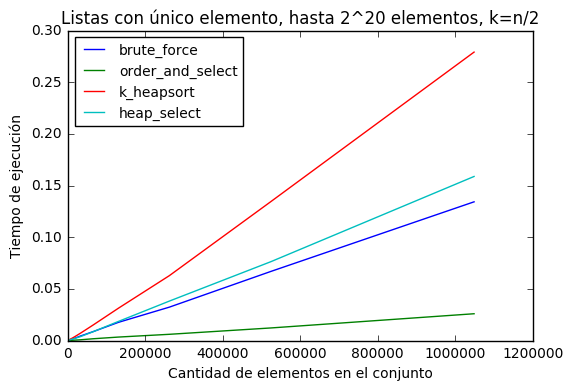

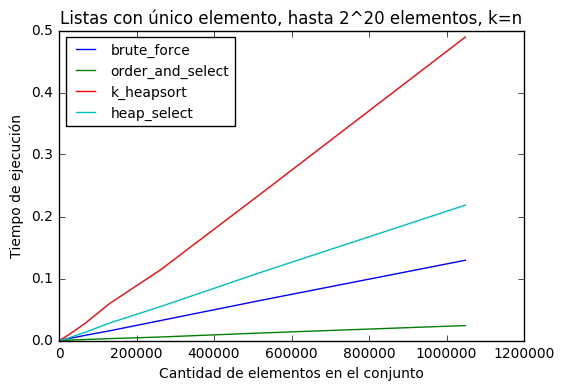

In [10]:
title = 'Listas con único elemento, hasta 2^20 elementos, k='
plot_algorithms([brute_force, order_and_select, k_heapsort, heap_select], min_k, items_getter=same_items, maxiter=21, title=title+'1')
plot_algorithms([brute_force, order_and_select, k_heapsort, heap_select], median_k, items_getter=same_items, maxiter=21, title=title+'n/2')
plot_algorithms([brute_force, order_and_select, k_heapsort, heap_select], max_k, items_getter=same_items, maxiter=21, title=title+'n')

### Elementos ordenados 

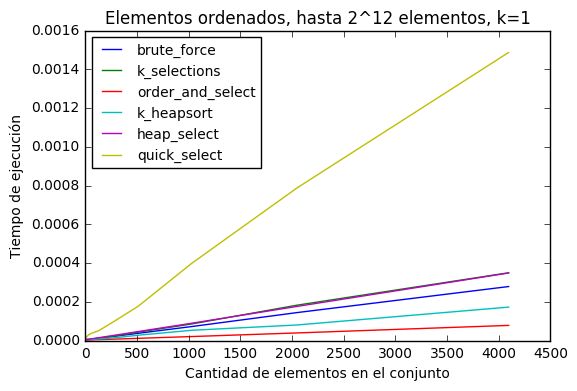

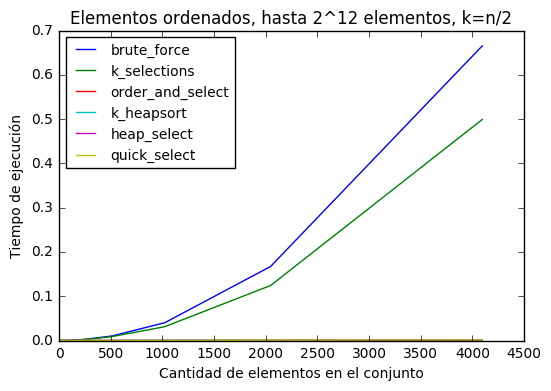

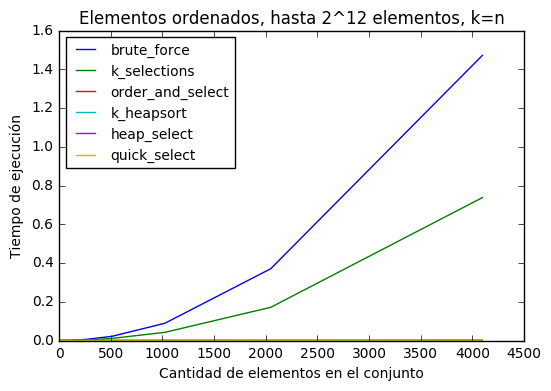

In [11]:
title = 'Elementos ordenados, hasta 2^12 elementos, k='
plot_algorithms(all_algs, min_k, items_getter=ordered_items, maxiter=13, title=title+'1')
plot_algorithms(all_algs, median_k, items_getter=ordered_items, maxiter=13, title=title+'n/2')
plot_algorithms(all_algs, max_k, items_getter=ordered_items, maxiter=13, title=title+'n')

### Elementos ordenados, solo algoritmos no exponenciales, 2^20 elementos

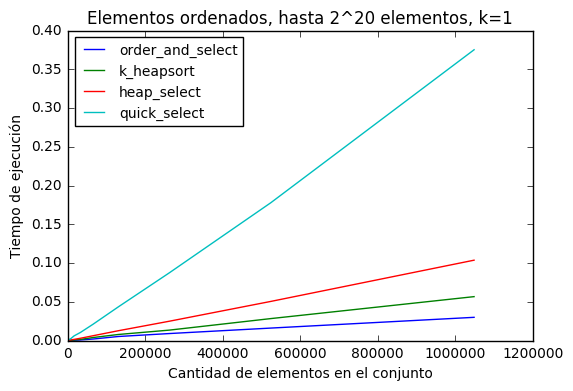

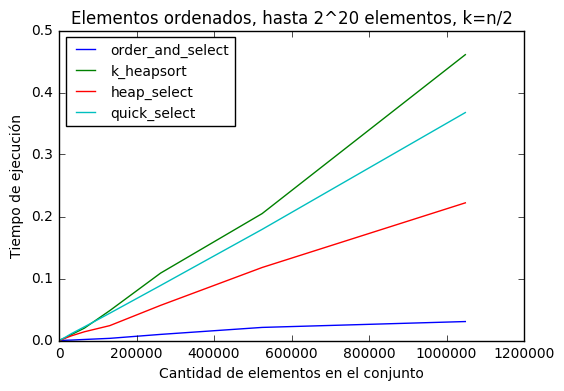

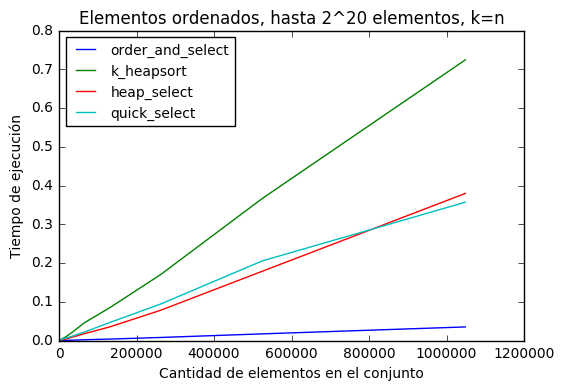

In [12]:
title = 'Elementos ordenados, hasta 2^20 elementos, k='
plot_algorithms(algs, min_k, items_getter=ordered_items, maxiter=21, title=title+'1')
plot_algorithms(algs, median_k, items_getter=ordered_items, maxiter=21, title=title+'n/2')
plot_algorithms(algs, max_k, items_getter=ordered_items, maxiter=21, title=title+'n')